In [38]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
files = glob.glob('Slurm_outputs/*')
files += glob.glob('cnn_outputs/*')
files

dfs = []
for file in files:
    try:
        info = file.split('_')
        df = pd.read_csv(file)
        
        df['model'] = 'resnet' if info[0] == 'Slurm' else 'cnn'
        df['server_alg'] = info[-2]
        if info[-2] == 'layer':
            df['server_alg'] = 'sdlbfgs per layer'
        dfs.append(df)
    except:
        pass
df = pd.concat(dfs)

In [41]:
df

,epoch,te_acc,te_loss,elapsed,model,server_alg
0,0,0.0991,2.309453,10.038362,resnet,adam
1,1,0.1028,2.318337,8.018645,resnet,adam
2,2,0.1075,2.335479,7.994140,resnet,adam
3,3,0.1014,2.344119,8.052572,resnet,adam
4,4,0.1000,2.346752,8.009890,resnet,adam
...,...,...,...,...,...,...
495,495,0.7553,0.717832,7.201226,cnn,shampoo
496,496,0.7512,0.727337,7.026778,cnn,shampoo
497,497,0.7493,0.727158,7.037567,cnn,shampoo
498,498,0.7479,0.733704,7.049420,cnn,shampoo


In [42]:
resnet = df[df.model == 'resnet']
cnn = df[df.model == 'cnn']

Text(0.5, 0.98, 'Comparison of Federated Algorithms on CNN')

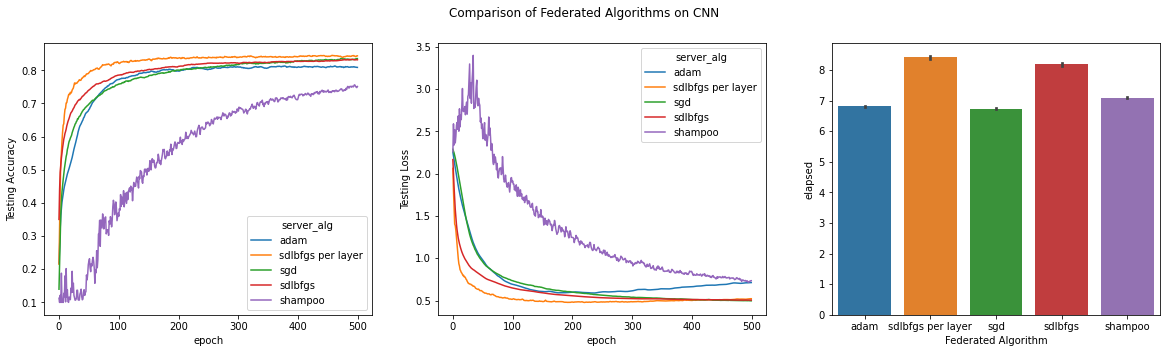

In [45]:
fig, axs = plt.subplots(1,3, figsize=(20,5), facecolor='w')

model = cnn
sns.lineplot(model, x='epoch', y='te_acc', hue='server_alg', ax=axs[0])
axs[0].set_ylabel('Testing Accuracy')

sns.lineplot(model, x='epoch', y='te_loss', hue='server_alg', ax=axs[1])
axs[1].set_ylabel('Testing Loss')

sns.barplot(cnn, x='server_alg', y='elapsed', ax=axs[2])
axs[2].set_xlabel('Federated Algorithm')

fig.suptitle('Comparison of Federated Algorithms on CNN')

Text(0.5, 0.98, 'Comparison of Federated Algorithms on resnet')

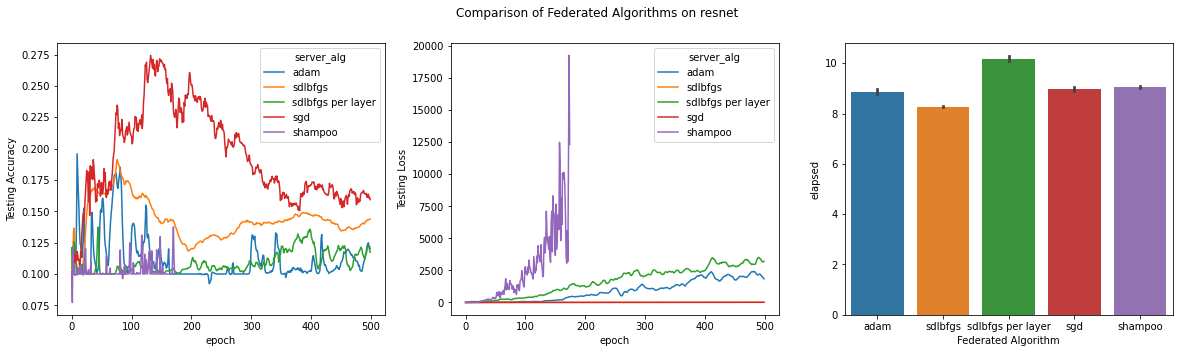

In [46]:
fig, axs = plt.subplots(1,3, figsize=(20,5), facecolor='w')

model = resnet
sns.lineplot(model, x='epoch', y='te_acc', hue='server_alg', ax=axs[0])
axs[0].set_ylabel('Testing Accuracy')

sns.lineplot(model, x='epoch', y='te_loss', hue='server_alg', ax=axs[1])
axs[1].set_ylabel('Testing Loss')

sns.barplot(resnet, x='server_alg', y='elapsed', ax=axs[2])
axs[2].set_xlabel('Federated Algorithm')

fig.suptitle('Comparison of Federated Algorithms on resnet')